Выполнить пакетное вейвлет-преобразование (ПВП). Объяснить построение дерева. 
Объяснить понятие и выбор энтропии для построения пакетного дерева.
Восстановить трендовые и периодические составляющие ВР без шума. Объяснить.

In [1]:
import numpy as np
import pandas as pd
import pywt
import pylab as mpl

from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm
%matplotlib inline

In [2]:
data = pd.read_table('data/asteroid_data.dat',sep=" ", header=None).drop(2,axis=1)
data.columns = ['time','value']
print(data.shape)

(20182, 2)


In [3]:
rcParams['figure.figsize'] = 10, 6

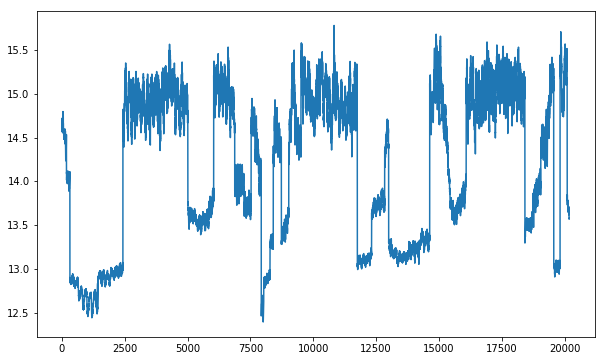

In [4]:
n = len(data.value.values)
fig, ax = plt.subplots()
ax.plot(data.value.values[:n])

In [5]:
x = data.value.values # [1,2,3,4,5,6,7,8]
wp = pywt.WaveletPacket(data=x, wavelet='db8', mode='symmetric',maxlevel=8)

['a', 'd']
['aa', 'ad', 'da', 'dd']
['aaa', 'aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd']
['aaaa', 'aaad', 'aada', 'aadd', 'adaa', 'adad', 'adda', 'addd', 'daaa', 'daad', 'dada', 'dadd', 'ddaa', 'ddad', 'ddda', 'dddd']
['aaaaa', 'aaaad', 'aaada', 'aaadd', 'aadaa', 'aadad', 'aadda', 'aaddd', 'adaaa', 'adaad', 'adada', 'adadd', 'addaa', 'addad', 'addda', 'adddd', 'daaaa', 'daaad', 'daada', 'daadd', 'dadaa', 'dadad', 'dadda', 'daddd', 'ddaaa', 'ddaad', 'ddada', 'ddadd', 'dddaa', 'dddad', 'dddda', 'ddddd']


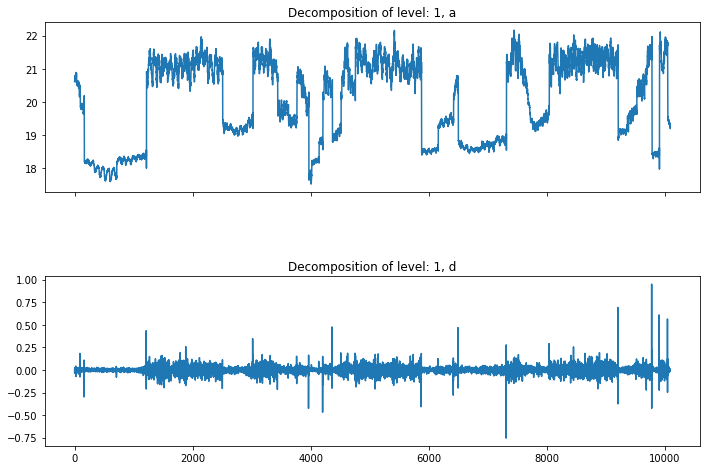

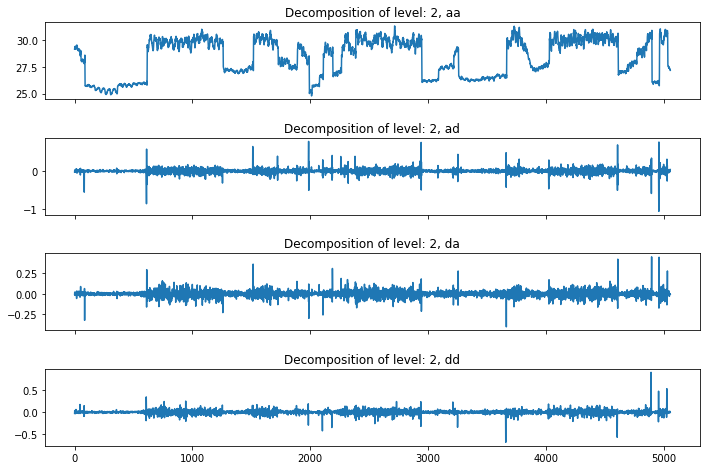

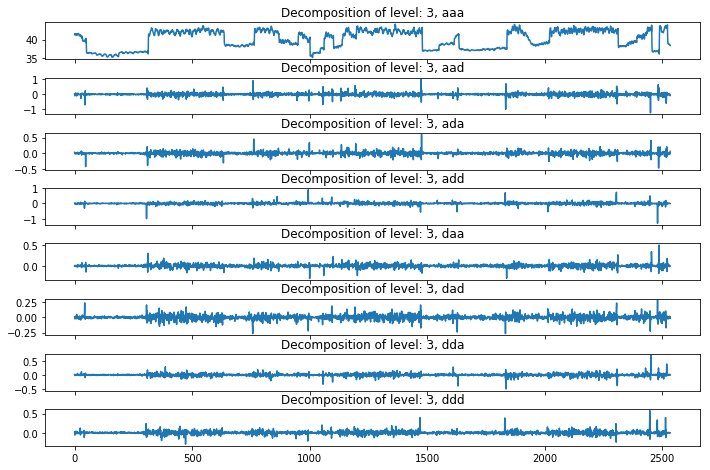

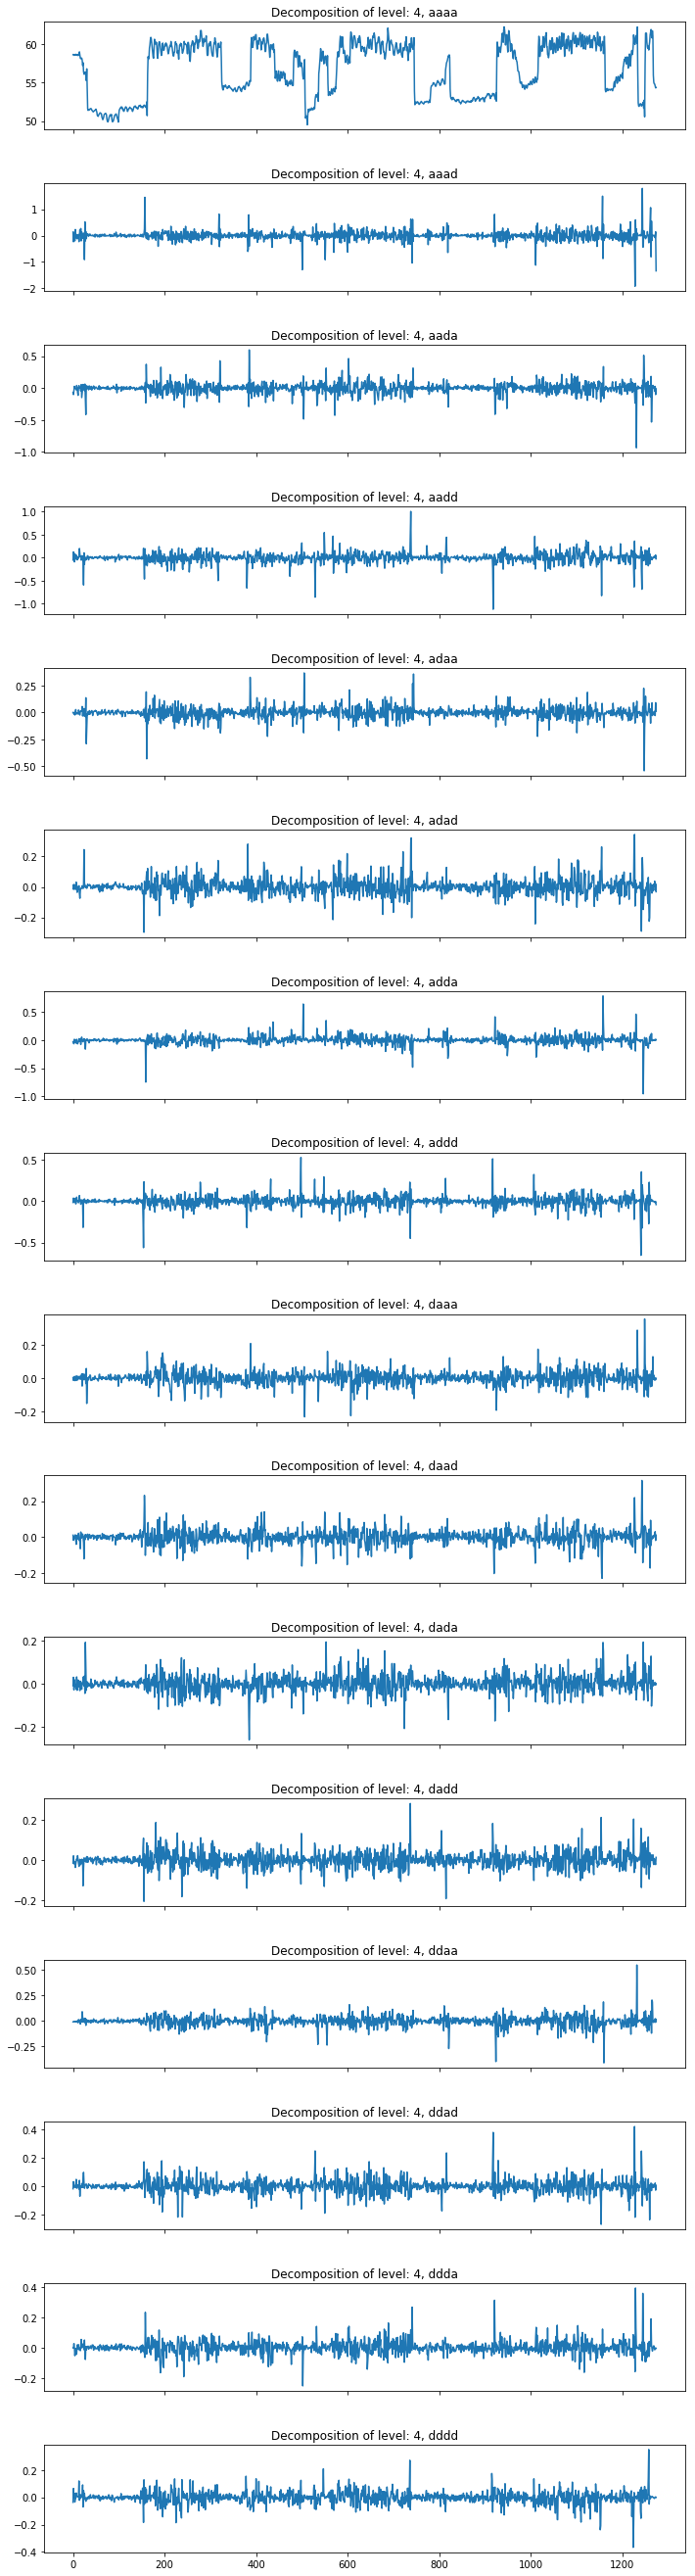

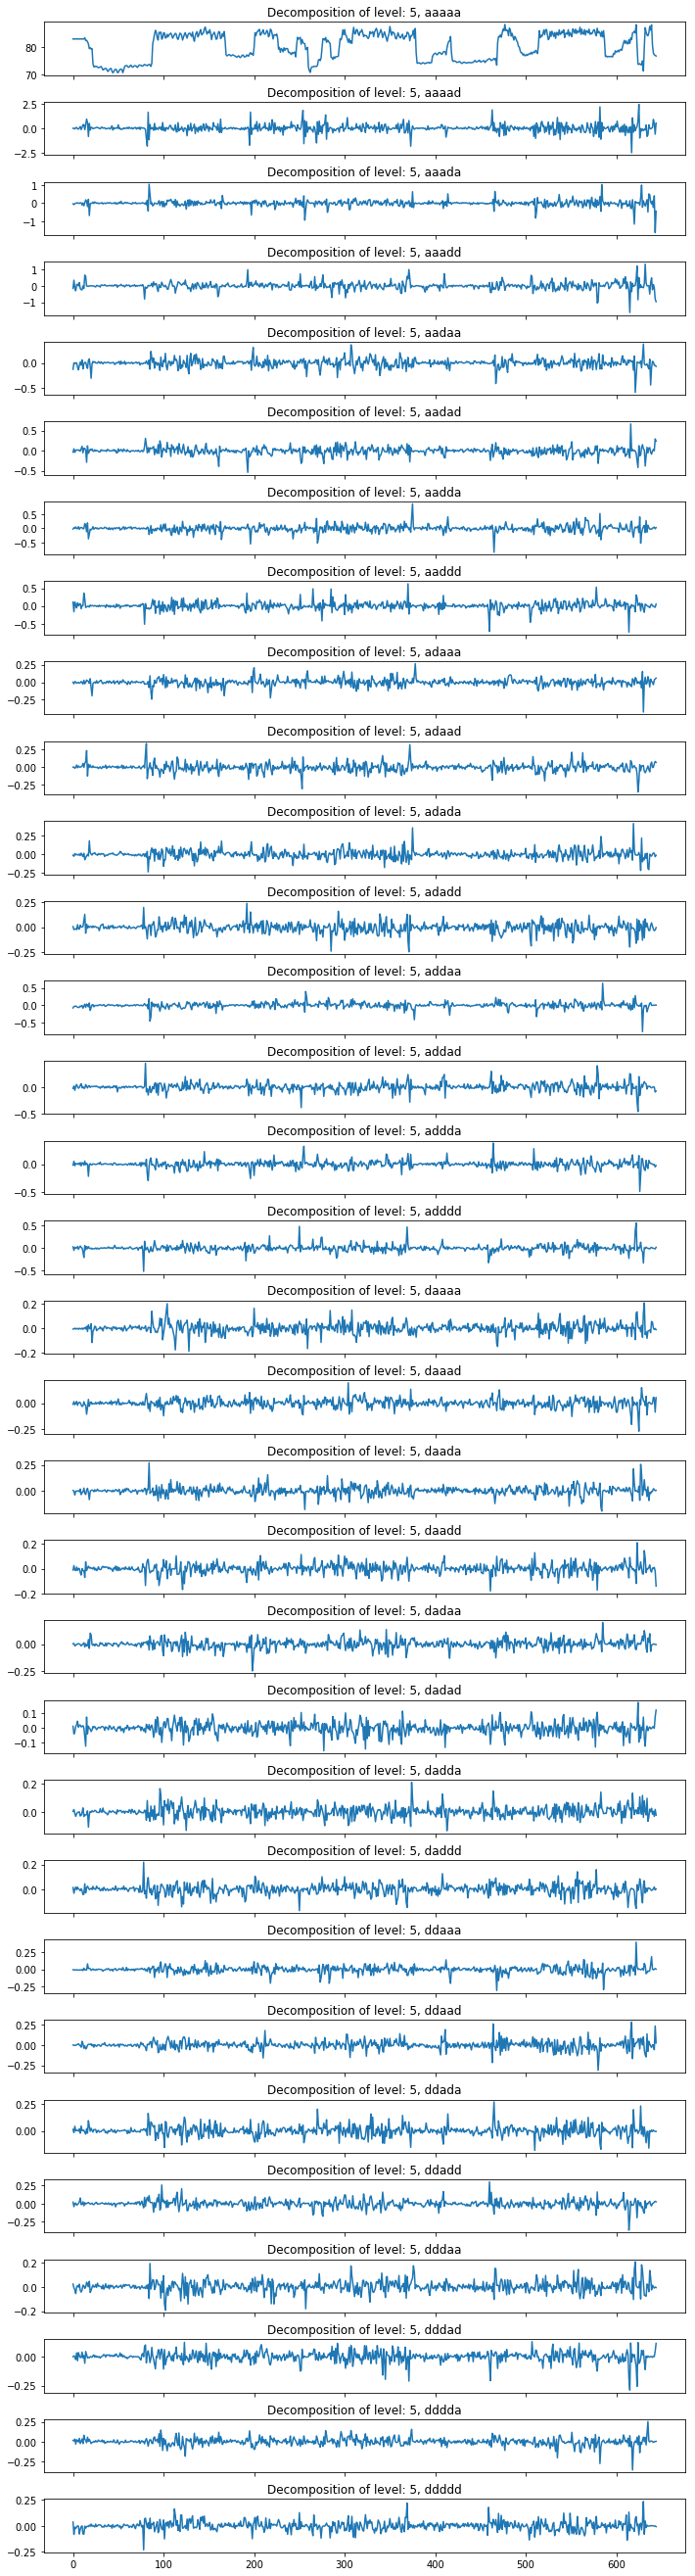

In [6]:
for i in range(0, min(5, wp['ad'].maxlevel)):
    nodes_path = [node.path for node in wp.get_level(i+1, 'natural')]
    print(nodes_path)
    fig, axarr = plt.subplots(len(nodes_path), sharex=True)
    if i >= 3:
        top = 6
    else:
        top=1
    fig.subplots_adjust(hspace=0.5, wspace=0.2, bottom=.02, left=.06,
                        right=.97, top=top)
    for index, path in enumerate(nodes_path):
        axarr[index].plot(wp[path].data)
        axarr[index].set_title('Decomposition of level: ' + str(i + 1) + ', ' +path)

In [7]:
[node.path for node in wp.get_level(6, 'natural')]

['aaaaaa',
 'aaaaad',
 'aaaada',
 'aaaadd',
 'aaadaa',
 'aaadad',
 'aaadda',
 'aaaddd',
 'aadaaa',
 'aadaad',
 'aadada',
 'aadadd',
 'aaddaa',
 'aaddad',
 'aaddda',
 'aadddd',
 'adaaaa',
 'adaaad',
 'adaada',
 'adaadd',
 'adadaa',
 'adadad',
 'adadda',
 'adaddd',
 'addaaa',
 'addaad',
 'addada',
 'addadd',
 'adddaa',
 'adddad',
 'adddda',
 'addddd',
 'daaaaa',
 'daaaad',
 'daaada',
 'daaadd',
 'daadaa',
 'daadad',
 'daadda',
 'daaddd',
 'dadaaa',
 'dadaad',
 'dadada',
 'dadadd',
 'daddaa',
 'daddad',
 'daddda',
 'dadddd',
 'ddaaaa',
 'ddaaad',
 'ddaada',
 'ddaadd',
 'ddadaa',
 'ddadad',
 'ddadda',
 'ddaddd',
 'dddaaa',
 'dddaad',
 'dddada',
 'dddadd',
 'ddddaa',
 'ddddad',
 'ddddda',
 'dddddd']

In [11]:
to_reconstruct = pywt.WaveletPacket(data=None, wavelet='db8', mode='symmetric')
to_reconstruct['aaaaaa'] = wp['aaaaaa'].data
to_reconstruct['daaaaa'] = wp['daaaaa'].data
to_reconstruct['adaaad'] = wp['adaaad'].data

In [12]:
reconstructed = to_reconstruct.reconstruct(update=True)

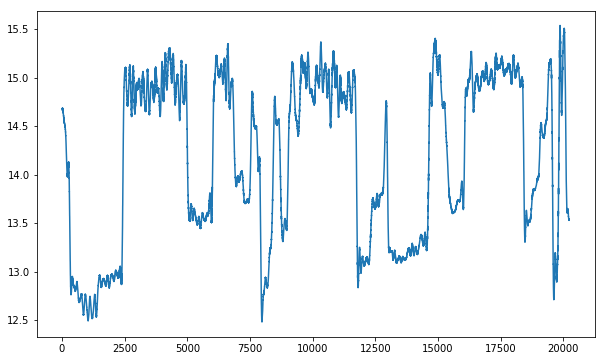

In [13]:
fig, ax = plt.subplots()
ax.plot(reconstructed) # 'aaaaaa', 'daaaaa', 'adaaad'

In [ ]:
# def plot(x, txt):
#     fig, ax = plt.subplots()
#     ax.plot(x)
#     fig = mpl.figure()
#     ax = mpl.axes([0.,0.1,0.55,0.4])
#     mpl.xlabel(txt)
#     ax.plot(x)

In [ ]:
#         print()
#         plt.figure()
#         plt.title()
#         ax = plt.subplot(gs[0, 0]) # row 0, col 0
#         plt.plot(wp[path].data)

#         ax = plt.subplot(gs[0, 1]) # row 0, col 1
#         plt.plot([0,1])
#     gs = gridspec.GridSpec(len(nodes_path),1)
#         plt.figure()
#         ax = plt.subplot(gs[index, 0]) 
#         plt.plot(wp[path].data)
#         plt.xlabel(path)
#         plt.title())